In [19]:
import pandas as pd
A=pd.read_csv('PRO.csv')
A.head()

,Year,Population_Total,Population_Growth_rate,Total_GDP,GDP_Growth_rate
0,1982,77427.539,2.633909,14985078.32,-1.788740
1,1983,79414.841,2.566660,13849725.17,-7.576558
2,1984,81448.757,2.561128,13779255.49,-0.508816
3,1985,83562.776,2.595520,14953913.05,8.524826
4,1986,85766.396,2.637083,15237987.29,1.899665


In [2]:
A.head()

,Year,Population_Total,Population_Growth_rate,Total_GDP,GDP_Growth_rate
0,1982,77427.539,2.633909,14985078.32,-1.788740
1,1983,79414.841,2.566660,13849725.17,-7.576558
2,1984,81448.757,2.561128,13779255.49,-0.508816
3,1985,83562.776,2.595520,14953913.05,8.524826
4,1986,85766.396,2.637083,15237987.29,1.899665


In [3]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    38 non-null     int64  
 1   Population_Total        38 non-null     float64
 2   Population_Growth_rate  38 non-null     float64
 3   Total_GDP               38 non-null     float64
 4   GDP_Growth_rate         38 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.6 KB


In [4]:
A.describe()

,Year,Population_Total,Population_Growth_rate,Total_GDP,GDP_Growth_rate
count,38.000000,38.000000,38.000000,3.800000e+01,38.000000
mean,2000.500000,129339.275132,2.611915,1.813884e+07,1.337542
std,11.113055,36778.039617,0.066050,1.408128e+07,17.394263
min,1982.000000,77427.539000,2.520021,5.546935e+04,-99.888741
25%,1991.250000,98291.151000,2.553591,3.498884e+06,0.996617
50%,2000.500000,123838.949500,2.616131,1.925235e+07,3.468975
75%,2009.750000,157458.637000,2.665031,2.337856e+07,6.711193
max,2019.000000,200963.603000,2.717190,4.985610e+07,14.604381


# Exploratory data analysis

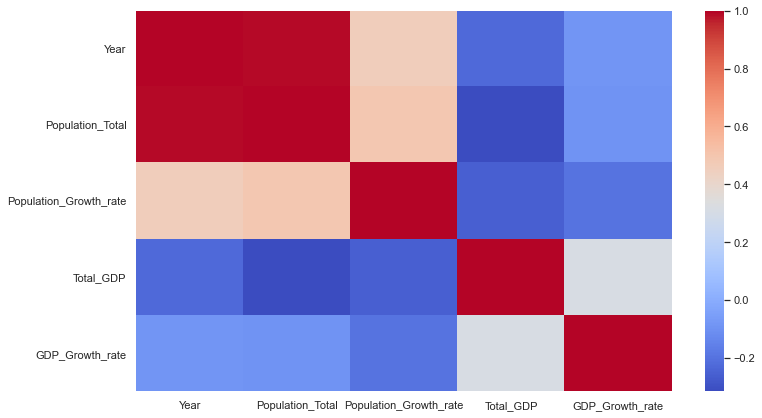

In [5]:
# Plot correlation matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize=(12, 7))
sns.heatmap(A.corr(), cmap="coolwarm")

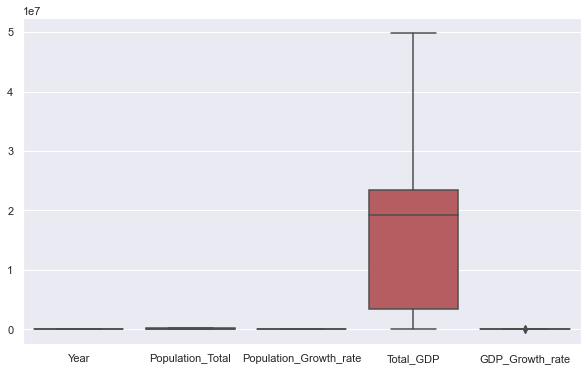

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(data=A, orient="v")
plt.show()

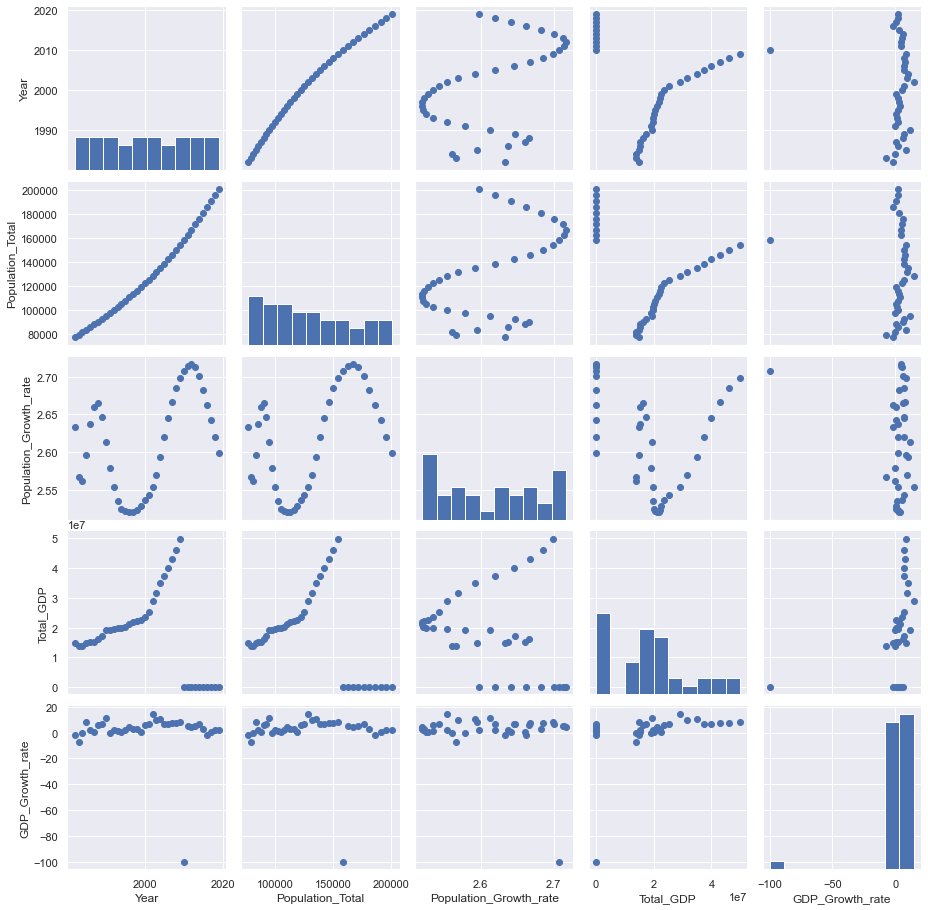

In [7]:
g = sns.PairGrid(A)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);
plt.show()

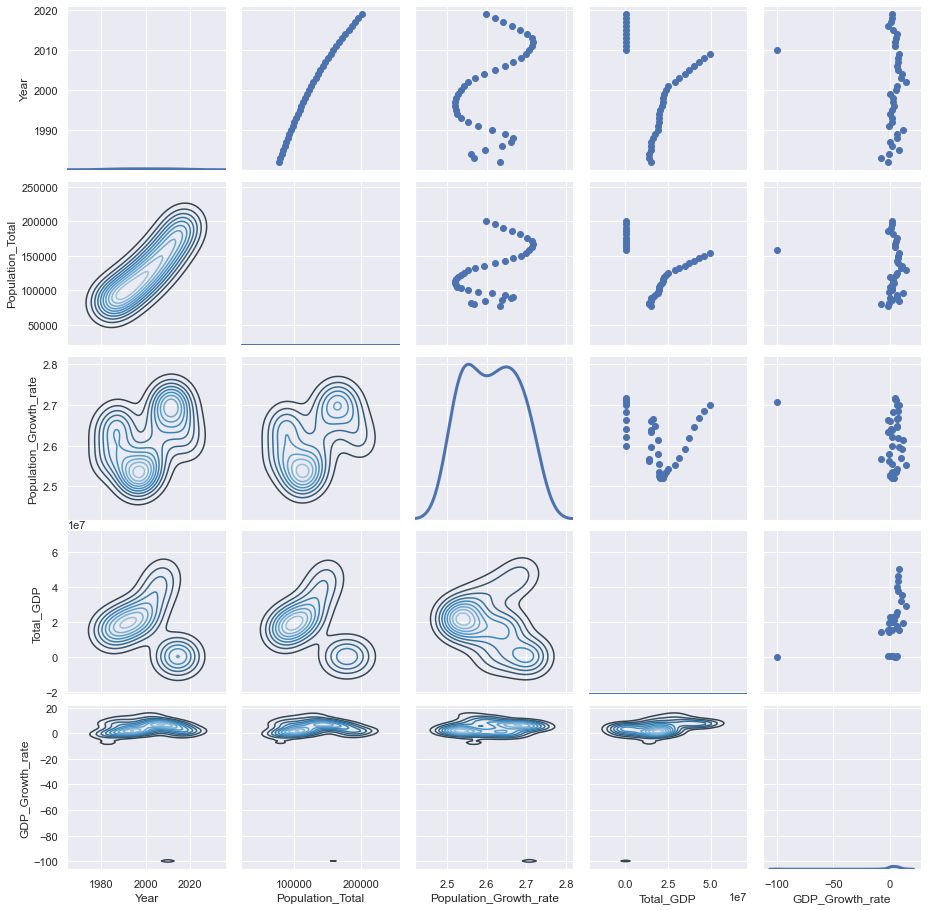

In [8]:
g = sns.PairGrid(A)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_diag(sns.kdeplot, lw=3, legend=False);
plt.show()

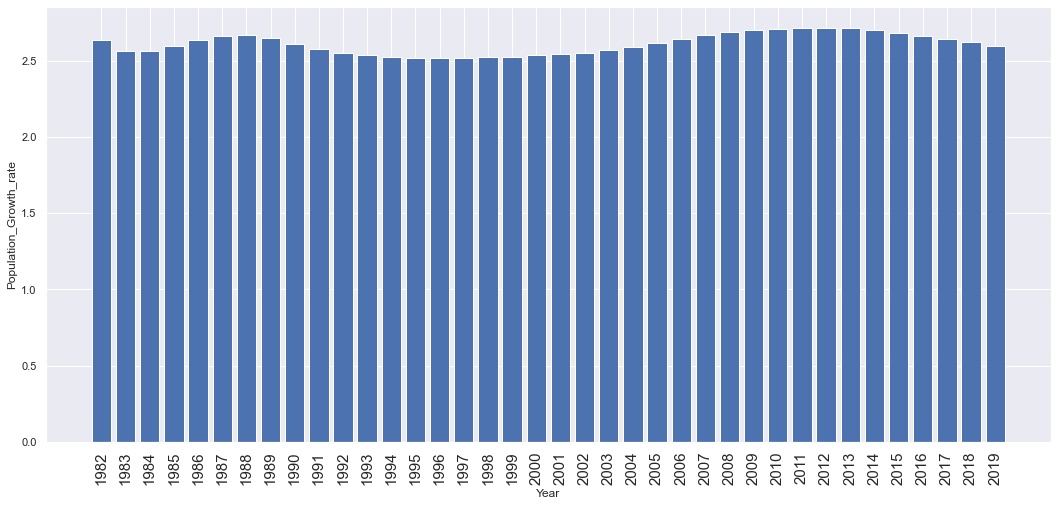

In [9]:
Year=[Year for Year,A in A.groupby('Year') ]
plt.figure(figsize=(18, 8))
plt.bar(Year,A['Population_Growth_rate'])
plt.xticks(Year,rotation='vertical',size=15)
plt.ylabel('Population_Growth_rate')
plt.xlabel('Year')
plt.show()

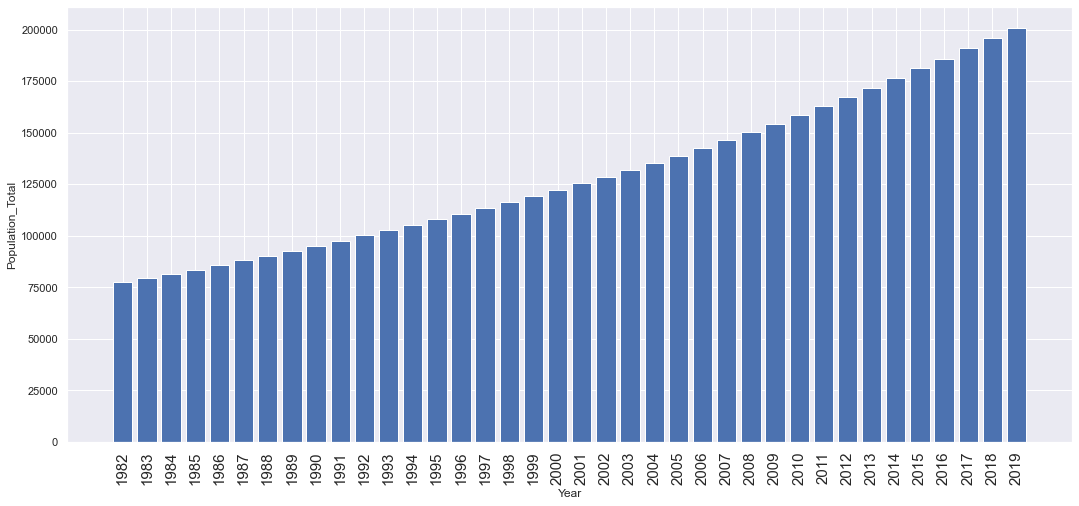

In [10]:
Year=[Year for Year,A in A.groupby('Year') ]
plt.figure(figsize=(18, 8))
plt.bar(Year,A['Population_Total'])
plt.xticks(Year,rotation='vertical',size=15)
plt.ylabel('Population_Total')
plt.xlabel('Year')
plt.show()

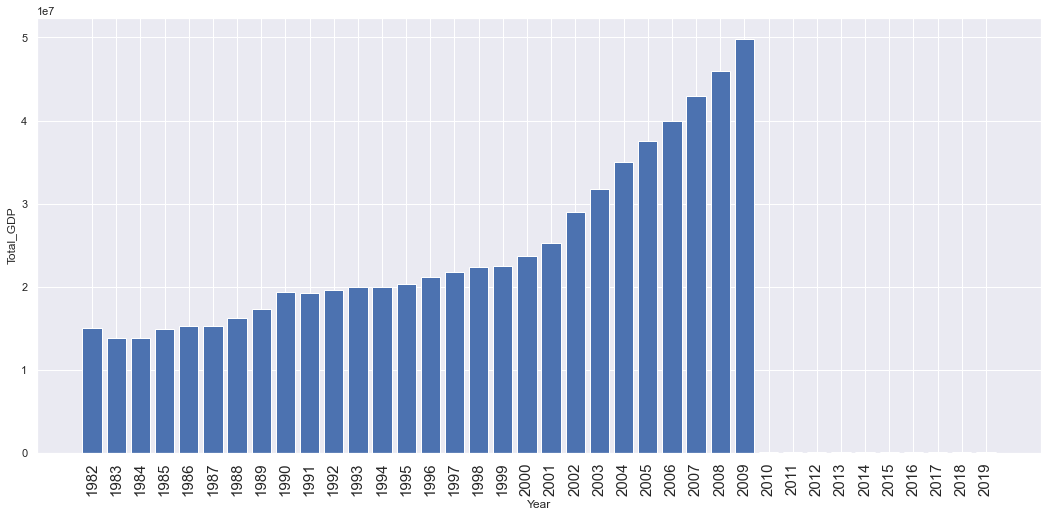

In [11]:
Total_GDP=[Total_GDP for Total_GDP,A in A.groupby('Total_GDP') ]
plt.figure(figsize=(18, 8))
plt.bar(Year,A['Total_GDP'])
plt.xticks(Year,rotation='vertical',size=15)
plt.ylabel('Total_GDP')
plt.xlabel('Year')
plt.show()

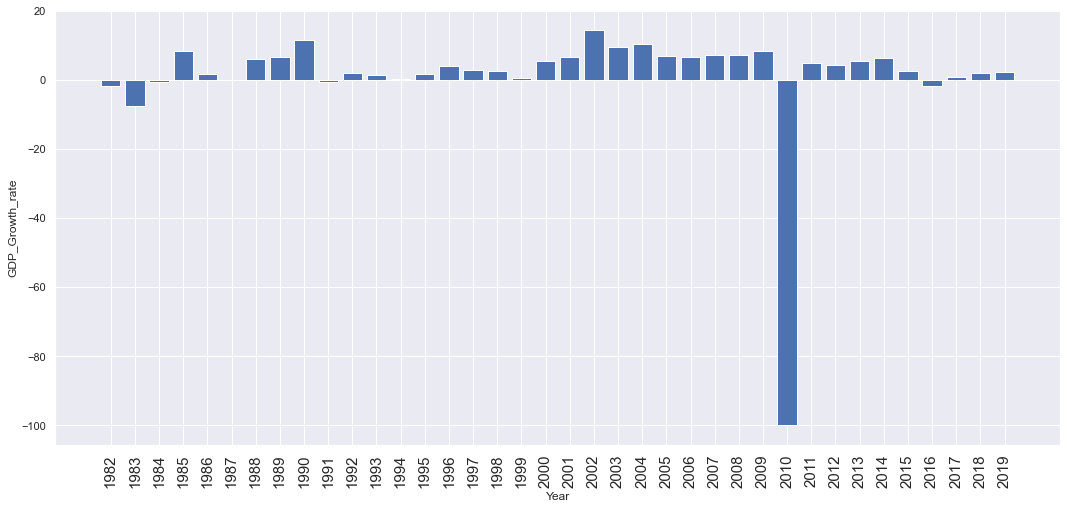

In [12]:
Year=[Year for Year,A in A.groupby('Year') ]
plt.figure(figsize=(18, 8))
plt.bar(Year,A['GDP_Growth_rate'])
plt.xticks(Year,rotation='vertical',size=15)
plt.ylabel('GDP_Growth_rate')
plt.xlabel('Year')
plt.show()

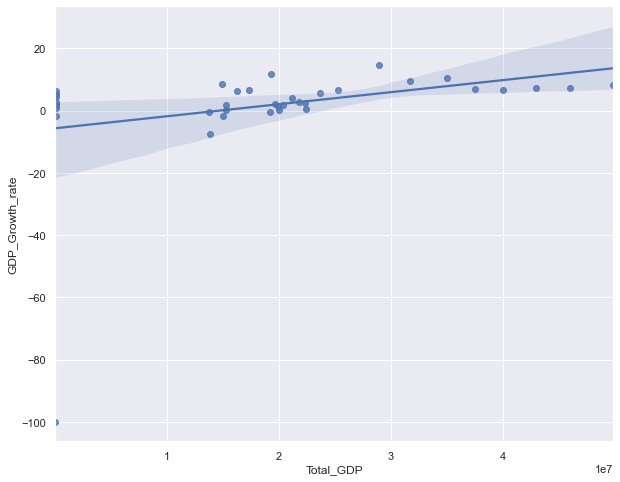

In [13]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize=(10, 8))
sns.regplot(x="Total_GDP", y="GDP_Growth_rate", data=A)

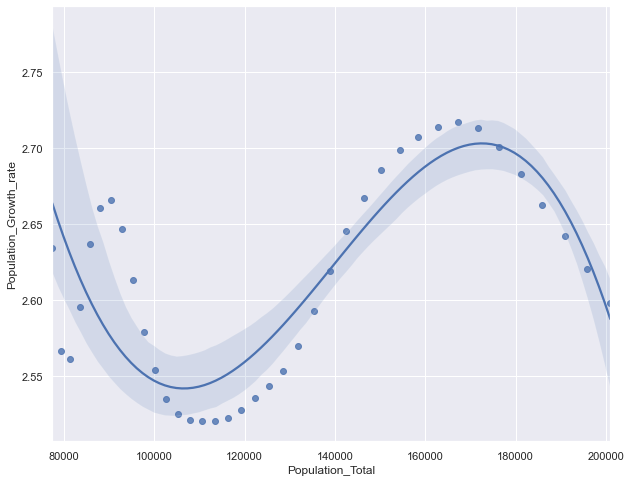

In [14]:
plt.figure(figsize=(10, 8))
sns.regplot(x="Population_Total", y="Population_Growth_rate", data=A, order=3)

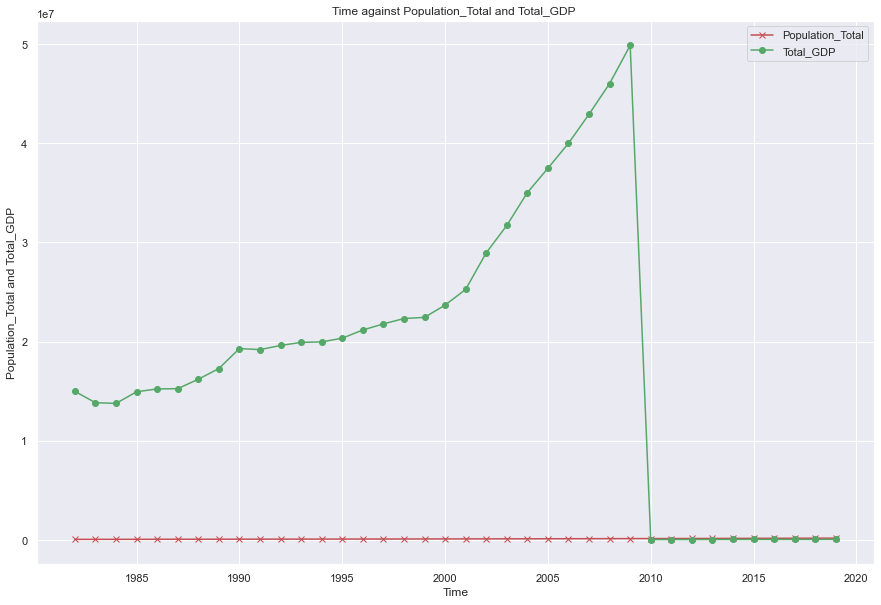

In [15]:
plt.figure(figsize=(15, 10))
Year=[Year for Year,A in A.groupby('Year') ]
x=Year
y1=A['Population_Total']
y2=A['Total_GDP']
plt.plot(x, y1, 'rx-',label='Population_Total')
plt.plot(x, y2, 'go-',label='Total_GDP' )
plt.xlabel('Time')
plt.ylabel('Population_Total and Total_GDP')
plt.title('Time against Population_Total and Total_GDP ')
plt.legend()

,Population_Total,Population_Growth_rate,Total_GDP,GDP_Growth_rate
Population_Total,1.000000,0.491945,-0.316104,-0.092573
Population_Growth_rate,0.491945,1.000000,-0.257785,-0.194514
Total_GDP,-0.316104,-0.257785,1.000000,0.313474
GDP_Growth_rate,-0.092573,-0.194514,0.313474,1.000000


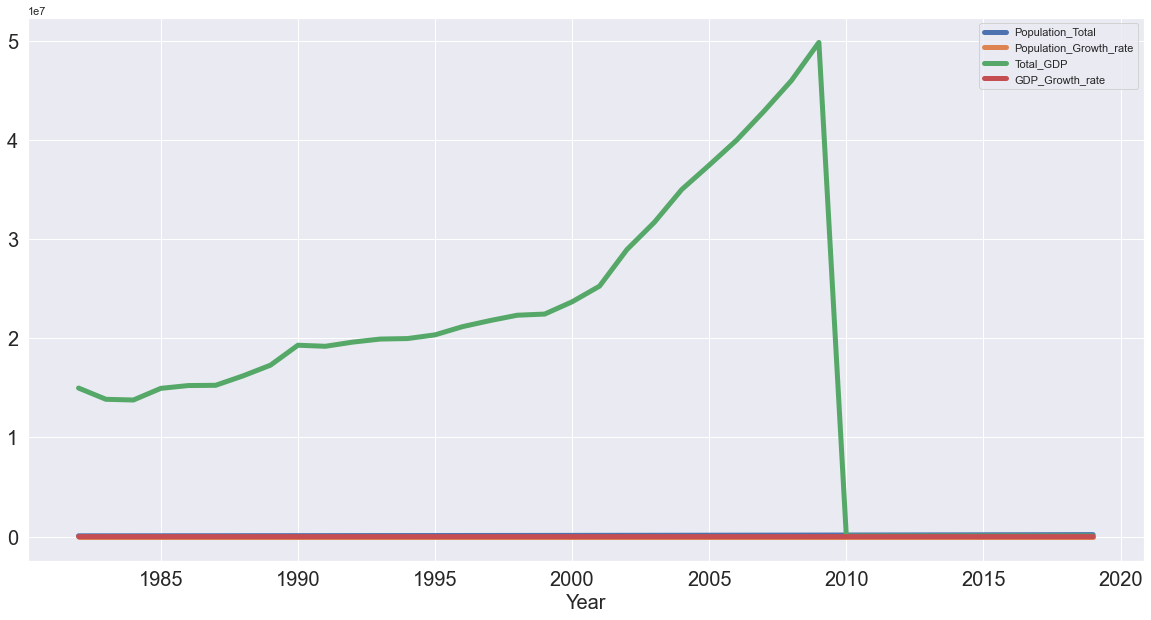

In [16]:
A.set_index('Year', inplace=True)
A.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);
A.corr()

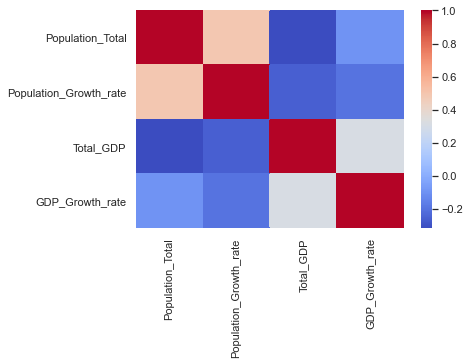

In [17]:
sns.heatmap(A.corr(), cmap="coolwarm")

# Regression Analysis

In [20]:
X = A.iloc[:,[3,4]].values
y =A.iloc[:, 2].values

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
from sklearn.metrics import mean_squared_error
predictions = lin_reg.predict(X)
lin_mse = mean_squared_error(y, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.06248724424191581

In [22]:
from sklearn.metrics import r2_score
R_Squared =r2_score(y, predictions)
R_Squared

0.08079063915347806

In [23]:
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor()
treereg.fit(X, y)
pred1 = treereg.predict(X)
treereg_mse = mean_squared_error(y, pred1)
treereg_rmse = np.sqrt(treereg_mse)
treereg_rmse

0.0

In [24]:
R_Squared =r2_score(y, pred1)
R_Squared

1.0

In [25]:
from sklearn.neighbors import KNeighborsRegressor
Knnreg = KNeighborsRegressor()
Knnreg.fit(X, y)
pred_1 = Knnreg.predict(X)
Knnreg_mse = mean_squared_error(y, pred_1)
Knnreg_rmse = np.sqrt(Knnreg_mse)
Knnreg_rmse

0.020299274135857148

In [26]:
R_Squared =r2_score(y, pred_1)
R_Squared

0.9029953146695394

In [27]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)
pred3 = svm_poly_reg.predict(X)
SVR_mse = mean_squared_error(y, pred3)
SVR_rmse = np.sqrt(SVR_mse)
SVR_rmse

0.06551795993813951

In [28]:
R_Squared =r2_score(y, pred3)
R_Squared

-0.01053748108025454

In [29]:
from sklearn import svm
SVRReg = svm.SVR(kernel='linear', gamma='auto')
SVRReg.fit(X, y)
pred4= SVRReg.predict(X)
SVRReg_mse = mean_squared_error(y, pred4)
SVRReg_rmse = np.sqrt(SVRReg_mse)
SVRReg_rmse

0.06551795993813951

In [30]:
R_Squared =r2_score(y, pred4)
R_Squared

-0.01053748108025454

In [31]:
from sklearn.ensemble import RandomForestRegressor
Ranfor = RandomForestRegressor()
Ranfor.fit(X,y)
pred5 = Ranfor.predict(X)
Ran_mse = mean_squared_error(y, pred5)
Ran_rmse = np.sqrt(Ran_mse)
Ran_rmse

0.00961756392876579

In [32]:
R_Squared =r2_score(y, pred5)
R_Squared

0.9782248147948042

# Regression metrics(RMSE) of promising Models

In [33]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treereg, X,y, scoring="neg_mean_squared_error", cv=10)
treereg_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(treereg_scores)

Scores: [0.07871719 0.06609048 0.05643937 0.00874845 0.01438207 0.05621492
 0.07626723 0.02555247 0.09754388 0.06191523]
Mean: 0.054187129654598376
Standard deviation: 0.027656321179484616


In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Knnreg, X,y, scoring="neg_mean_squared_error", cv=10)
Knnreg_scores = np.sqrt(-scores)
display_scores(Knnreg_scores)

Scores: [0.05641871 0.06470129 0.03753449 0.03147909 0.0097696  0.02295496
 0.10034656 0.05138872 0.02859099 0.07727673]
Mean: 0.04804611307017615
Standard deviation: 0.026089372919389252


In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Ranfor, X,y, scoring="neg_mean_squared_error", cv=10)
Ranfor_scores = np.sqrt(-scores)
display_scores(Ranfor_scores)

Scores: [0.06149631 0.05934667 0.04073412 0.01914686 0.01785394 0.03713499
 0.07383474 0.04627515 0.05760747 0.05852486]
Mean: 0.047195511149454396
Standard deviation: 0.017578510882277278


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

# Ensemble Learning Methods

In [37]:
from sklearn.ensemble import AdaBoostRegressor
ADBregr = RandomForestRegressor(random_state=0,n_estimators=100)
ADBregr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [38]:
RF=ADBregr.predict(X_test)
RF

array([2.70624453, 2.63974931, 2.59350636, 2.57243204, 2.53347874,
       2.58431645, 2.63202917, 2.62069738, 2.52907259, 2.6206864 ])

In [39]:
Ran_mse = mean_squared_error(y_test,RF)
Ran_rmse = np.sqrt(Ran_mse)
Ran_rmse

0.017475640547296008

In [40]:
R_Squared =r2_score(y_test,RF)
R_Squared

0.9114267296602263

In [41]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

In [42]:
param_dist = {'max_samples': [0.5,1.0,1.5],
'max_features' : [0,0.5,1.0,1.5],'oob_score' : [True, False],
'base_estimator__n_neighbors': [3,4,5,6,7,8,9],'n_estimators': [100]}
single_estimator = KNeighborsRegressor()
ensemble_estimator = BaggingRegressor(base_estimator =single_estimator)

In [43]:
Rdbag = RandomizedSearchCV(ensemble_estimator, param_distributions = param_dist,cv=3,n_iter = 5,n_jobs=-1)
Rdbag.fit(X_train, y_train)
Rdbag.best_params_

{'oob_score': False,
 'n_estimators': 100,
 'max_samples': 1.0,
 'max_features': 0.5,
 'base_estimator__n_neighbors': 5}

In [44]:
rs_bag = BaggingRegressor(**{'max_features': 1.0,'max_samples': 0.5,
'n_estimators': 100,'oob_score': False,'base_estimator': KNeighborsRegressor(n_neighbors=5)})
rs_bag.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(), max_samples=0.5,
                 n_estimators=100)

In [47]:
y_pred = rs_bag.predict(X_test)
Ran_mse = mean_squared_error(y_test,y_pred)
Ran_rmse = np.sqrt(Ran_mse)
print (Ran_rmse)
print ("R-squared",r2_score(y_test, y_pred))

0.04458241893879035
R-squared 0.4235472293185444


# cross-validation of Decision tree Regression

In [48]:
from sklearn. cross_validation import cross_val_score
from sklearn.tree import DecisionTreeRegressor
Dtr = DecisionTreeRegressor()

In [50]:
from sklearn.model_selection import GridSearchCV
Gs = GridSearchCV(Dtr, param_grid = {'max_depth':np.arange(3,22)},cv=10)
Gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21])})

In [51]:
Gs.best_estimator_

DecisionTreeRegressor(max_depth=15)

In [52]:
y_pred1 = Gs.predict(X_test)
from sklearn.metrics import mean_absolute_error
Ran_mse = mean_squared_error(y_test,y_pred1)
Ran_rmse = np.sqrt(Ran_mse)
print (Ran_rmse)
print ("R-squared",r2_score(y_test, y_pred1))

0.01943514084739562
R-squared 0.8904501320502562
